In [3]:
import pandas as pd
from ast import literal_eval

def load_dataset(dataset_path):
    dataset = pd.read_csv(dataset_path)
    print(f"\n> Loading {dataset.shape[0]} examples located at '{dataset_path}'\n")

    dataset["spans"] = dataset.spans.apply(literal_eval)
    text = dataset["text"]
    spans = dataset["spans"]
   
    return text, spans

text, spans = load_dataset('../data/tsd_train.csv')


> Loading 7939 examples located at '../data/tsd_train.csv'



In [42]:
total = [len(span) for span in spans]
avg = sum(total) / len(total)
print(avg)
from collections import Counter
count = Counter(total)
arr = sorted(list(count.items()))
print(arr)

17.522987781836502
[(0, 485), (2, 3), (3, 70), (4, 599), (5, 904), (6, 1221), (7, 435), (8, 432), (9, 406), (10, 340), (11, 226), (12, 284), (13, 200), (14, 227), (15, 185), (16, 124), (17, 143), (18, 119), (19, 98), (20, 93), (21, 96), (22, 81), (23, 60), (24, 54), (25, 55), (26, 44), (27, 53), (28, 49), (29, 39), (30, 34), (31, 28), (32, 25), (33, 28), (34, 35), (35, 20), (36, 22), (37, 21), (38, 22), (39, 19), (40, 18), (41, 19), (42, 16), (43, 18), (44, 11), (45, 13), (46, 7), (47, 11), (48, 14), (49, 10), (50, 8), (51, 19), (52, 13), (53, 6), (54, 9), (55, 10), (56, 5), (57, 10), (58, 5), (59, 7), (60, 6), (61, 8), (62, 5), (63, 4), (64, 8), (65, 5), (66, 6), (67, 3), (68, 7), (69, 4), (70, 1), (71, 2), (72, 6), (73, 3), (74, 4), (75, 3), (76, 3), (77, 2), (78, 3), (79, 5), (80, 4), (81, 4), (82, 3), (83, 2), (84, 2), (85, 6), (86, 6), (87, 2), (88, 1), (89, 2), (90, 5), (91, 2), (92, 1), (93, 1), (94, 3), (95, 4), (96, 3), (97, 5), (98, 2), (99, 2), (100, 5), (101, 5), (102, 2), 

In [41]:
from ast import literal_eval

file = open('predictions.txt', 'r') 
gold, pred = 0, 0
count = 0
for line in file.readlines():
    info = literal_eval(line)
    print(f"Text: {info[0]}")
    print(f"Gold: {info[1]}")
    print(f"Pred: {info[2]} \n")
    count += 1
    gold += sum([len(word) for word in info[1]])
    pred += sum([len(word) for word in info[2]])
    

# print(f"Missclassify: {count/total}")

Text: ["Ignorant idiots like that should lose their driver's license."]
Gold: ['Ignorant', 'idiots']
Pred: [] 

Text: ['FINALLY COMING OUT  WHAT A PERVERT THE SON OF A BITCH IS!']
Gold: []
Pred: ['FINALLY', 'SON', 'BITCH'] 

Text: ['Typical lying Liberal.']
Gold: ['lying']
Pred: ['lying'] 

Text: ["This is absolutely ridiculous, if someone flys a flag who cares??? But If blacks wear their malcolm x that's ok right???? Some blacks are more racist than whites!!!"]
Gold: ['ridiculous']
Pred: ['ridiculous'] 

Text: ['Poll your ass off.  We have a process for selecting our government leaders.  It is called an "election".  Unless something changes, you are stuck with you choices made in 2016.  Next election is 2018, you are free to make your changes then.\nPolls are bull----.  The were all wrong in the last election cycle.  The polls did not select our President, Representative or Senator.........the election did.  Live with it.']
Gold: ['ass']
Pred: ['ass'] 

Text: ['NIGERS WERE SEEN SWIMMI


Text: ['Can you back up your assertion? What, other than how you feel, would legitimize your opinion?\n\nEquating any U.S. President to Hitler is, to me, idiotic.']
Gold: ['idiotic']
Pred: ['idiotic'] 

Text: ['Policy by brash disdain.\n\nAnd again, Alaska could end up bearing the brunt of this idiocy.']
Gold: ['idiocy']
Pred: ['idiocy'] 

Text: ["I'm surprised these clowns were able to navigate to the correct address this time around."]
Gold: ['clowns']
Pred: ['clowns'] 

Text: ['And being "extremely negligent" with classified information is not far more immoral and moronic?  Oh, dear.']
Gold: ['negligent', 'immoral', 'moronic']
Pred: ['moronic'] 

Text: ["The problem is lawyers not illegals.  Let's deport all the lawyers."]
Gold: []
Pred: ['illegals'] 

Text: ['Useless dems. Start making arrests. Get vagrancy laws back on the books.\nAnd exactly what qualifications for the position does Souki have?\nHis dad?']
Gold: ['Useless', 'vagrancy']
Pred: ['Useless', 'dems'] 

Text: ["Foreign

Text: ['Trump has no gauge on what to say to any audience.   If an audience of blow up dolls filled a stadium, to which Trump  graced with his immeasurable wisdom and insight?  He would not know the difference.  Completely clueless.']
Gold: ['clueless']
Pred: ['clueless'] 

Text: ['Buck once again cements his place as the dumbest politician in Colorado. See kids, you can be a complete, blithering idiot and get elected to Congress. In what manner has Trump, "led," Ken? Is it his infantile, incessant tweeting like a thirteen year old girl that you deem leadership? Or his new strategy of threats against those charged with investigating his malfeasance? From my viewpoint, fortunately there are a few sane GOP members of Congress left who are determined to keep Trump, Buck and the other bullies from destroying this nation and the GOP. The true RINOS are the far right radicals who would turn this nation into a theocracy designed to worship greed.']
Gold: ['idiot']
Pred: ['dumbest', 'idiot'] 


In [38]:
print(f"Gold avg: {gold / count}")
print(f"Pred avg: {pred / count}")

Gold avg: 12.67170445004198
Pred avg: 9.01007556675063


<Figure size 720x504 with 0 Axes>

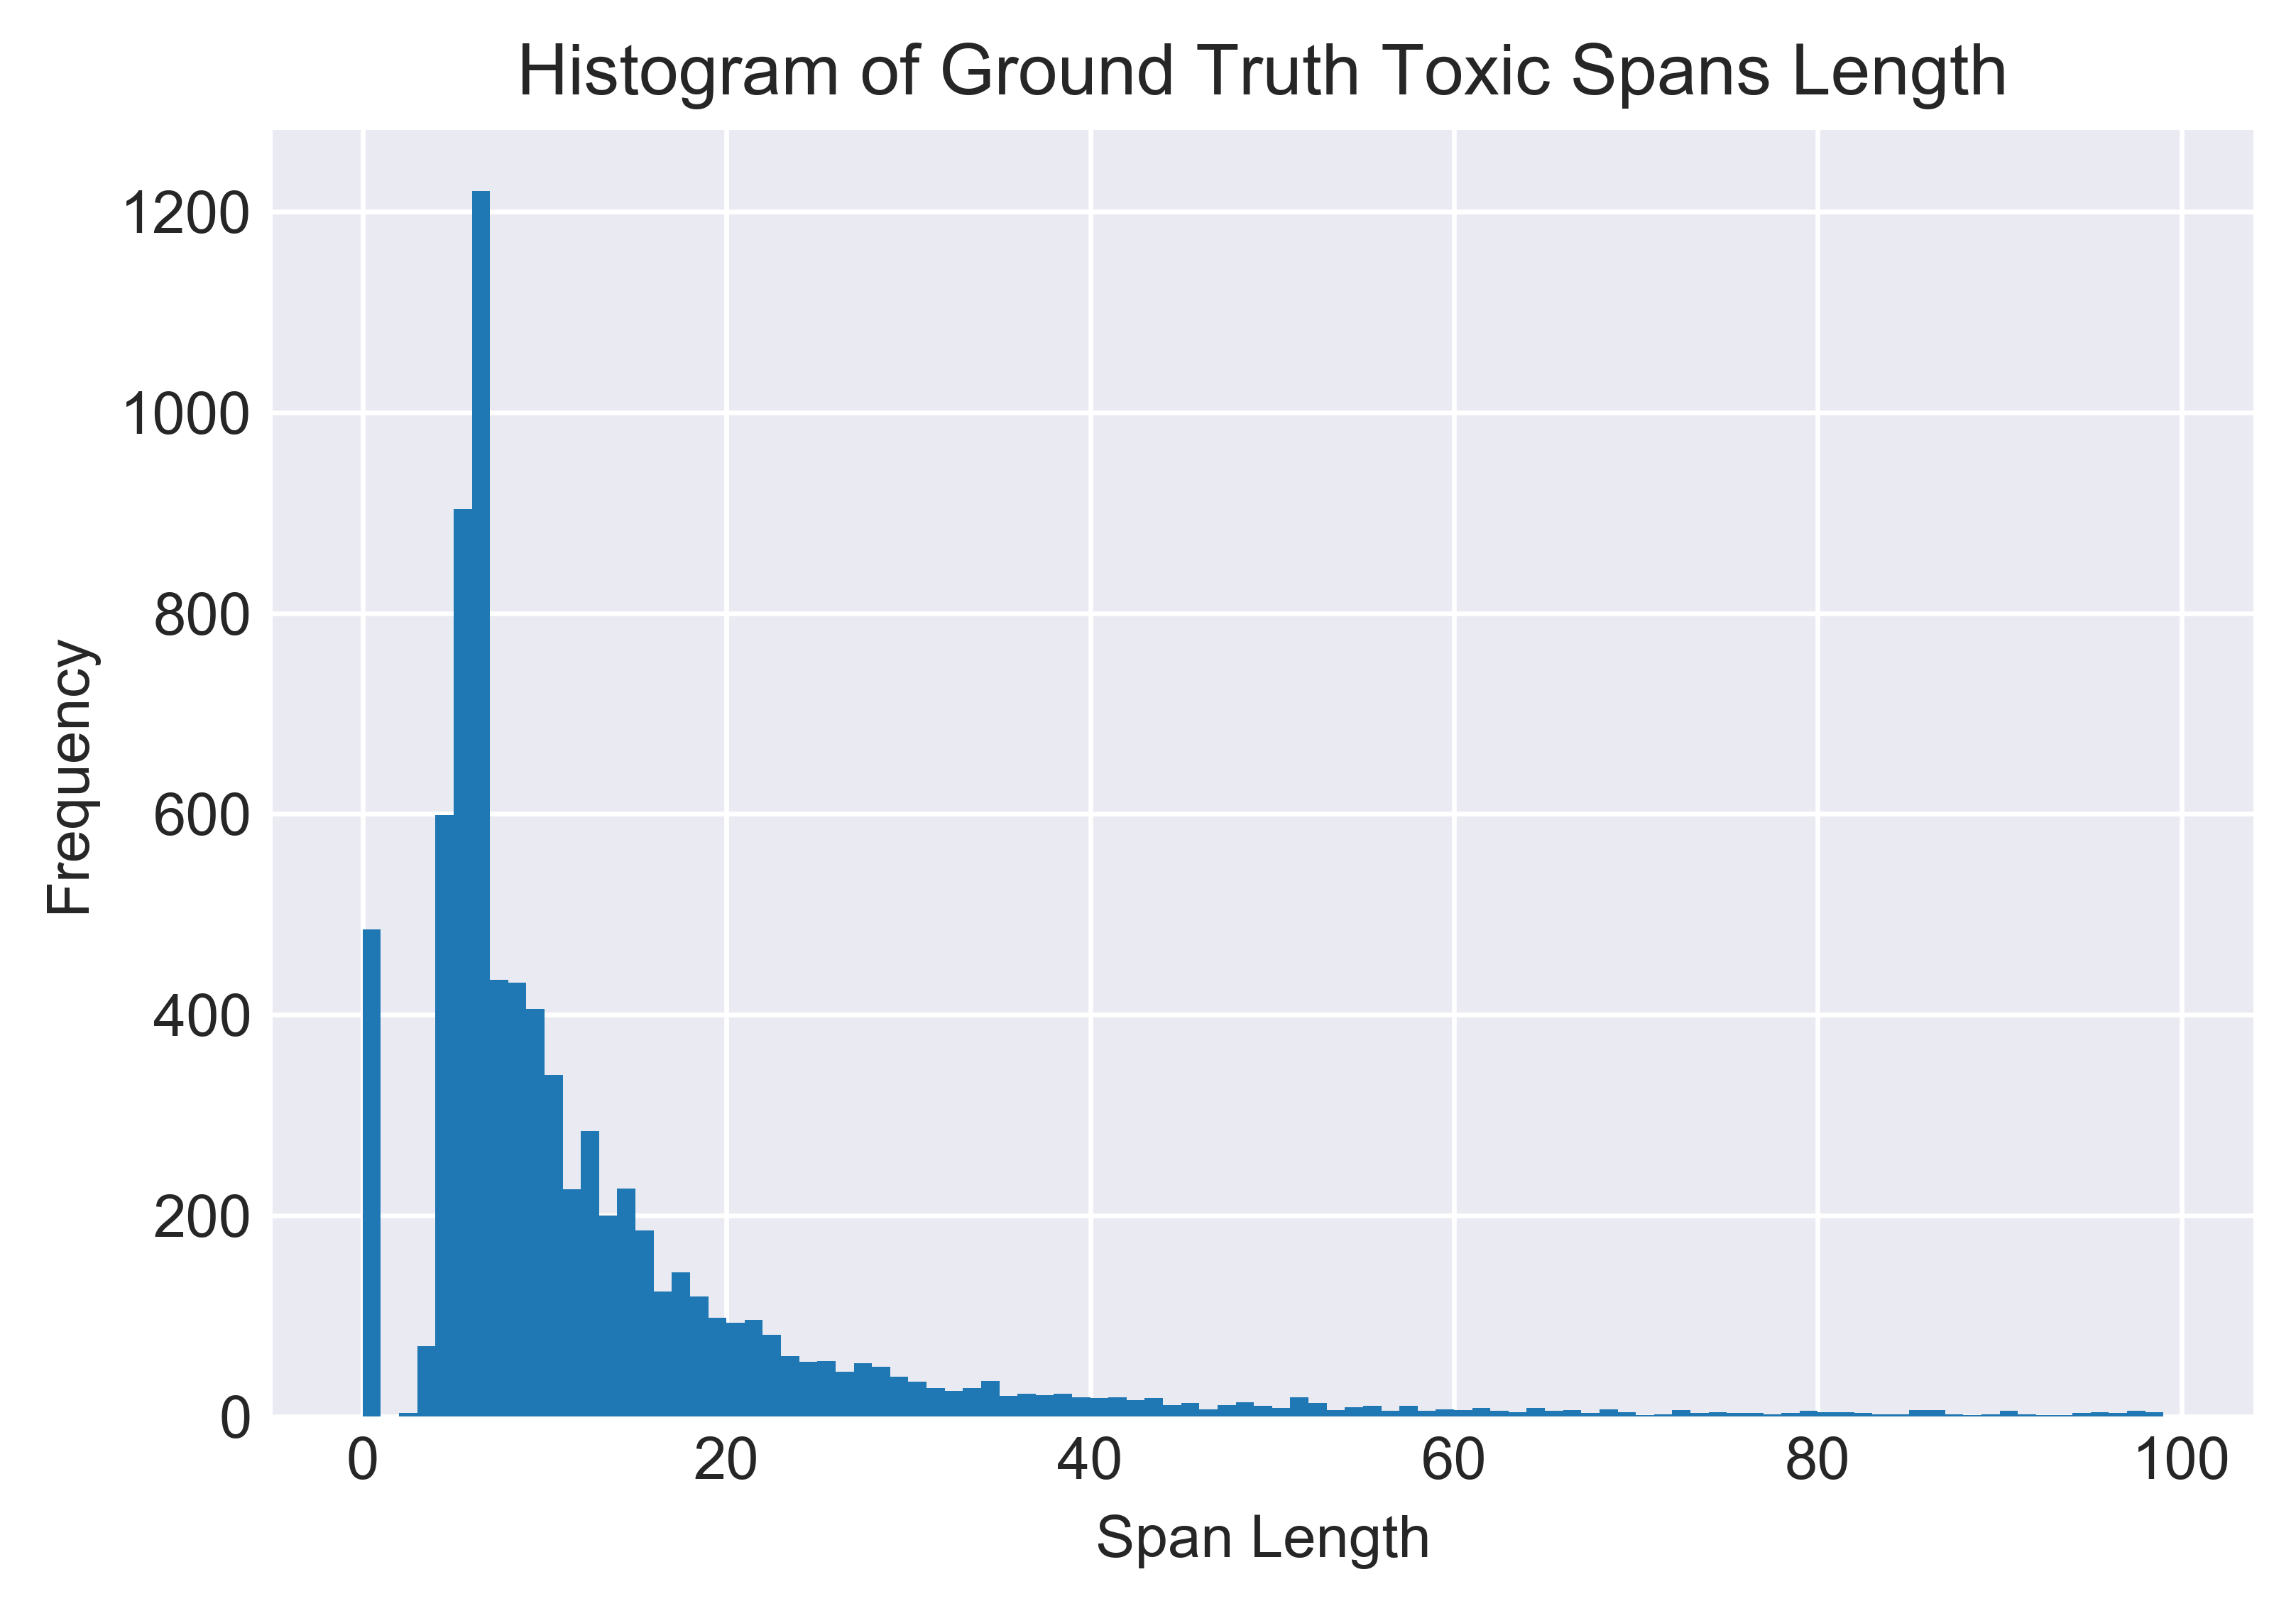

In [70]:
import matplotlib.pyplot as plt
import numpy as np   

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.style.use('seaborn-darkgrid')
plt.figure(dpi=600)


plt.xlabel("Span Length")
plt.ylabel("Frequency")
    
bins = [i for i in range(0, 100, 1)]
plt.hist(np.array(total), bins)
  
plt.title("Histogram of Ground Truth Toxic Spans Length")  
  
# show plot 
plt.show() 

In [76]:
!pip install nltk

In [77]:
import nltk
from nltk.tokenize import sent_tokenize
para = "Hello World. It's good to see you. Thanks for buying this book."
sent_tokenize(para)

ModuleNotFoundError: No module named 'nltk'